In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv("C:\\Users\\anupa\\OneDrive - vit.ac.in\\Notebooks\\PROJECTS\\SET\\SURVEY ON INDIAN EDUCATION SYSTEM.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
# Create new pandas DataFrame.
df2 = df[["What are the factors or circumstances that influenced you to change your preference? "]]
df2.head()

,What are the factors or circumstances that influenced you to change your preference?
0,"I felt that, I can do courses later, or come u..."
1,More employment opportunities
2,Brutal competition
3,"The competitive atmosphere around me, and the ..."
4,Less medical seats


In [5]:
# Step 1: Cleaning the text
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2["What are the factors or circumstances that influenced you to change your preference? "].dropna().apply(clean).astype(str)
print(df2['Cleaned Reviews'])

0      I felt that I can do courses later or come up ...
1                          More employment opportunities
2                                     Brutal competition
3      The competitive atmosphere around me and the n...
4                                     Less medical seats
                             ...                        
141                                              Nothing
142         There was no facts I liked both the subjects
143                                              Nothing
144                       I didn t change my preference 
145                                           Not arise 
Name: Cleaned Reviews, Length: 146, dtype: object


<ipython-input-5-4b2c055553d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cleaned Reviews'] = df2["What are the factors or circumstances that influenced you to change your preference? "].dropna().apply(clean).astype(str)


In [6]:
# Step 2: Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
get_ipython().system('pip install -U textblob')

In [8]:
print(df2.head())

  What are the factors or circumstances that influenced you to change your preference?   \
0  I felt that, I can do courses later, or come u...                                      
1                      More employment opportunities                                      
2                                 Brutal competition                                      
3  The competitive atmosphere around me, and the ...                                      
4                                 Less medical seats                                      

                                     Cleaned Reviews  
0  I felt that I can do courses later or come up ...  
1                      More employment opportunities  
2                                 Brutal competition  
3  The competitive atmosphere around me and the n...  
4                                 Less medical seats  


In [9]:
# POS tagger dictionary

from textblob import TextBlob

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

In [10]:
df2['POS tagged'] = df2['Cleaned Reviews'].dropna().apply(pos_tagger)
print(df2['POS tagged'])

0      [I, felt, that, I, can, do, course, later, or,...
1                        [More, employment, opportunity]
2                                  [Brutal, competition]
3      [The, competitive, atmosphere, around, me, and...
4                                  [Less, medical, seat]
                             ...                        
141                                            [Nothing]
142    [There, be, no, fact, I, like, both, the, subj...
143                                            [Nothing]
144                 [I, didn, t, change, my, preference]
145                                         [Not, arise]
Name: POS tagged, Length: 146, dtype: object


<ipython-input-10-f813ca82a9a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS tagged'] = df2['Cleaned Reviews'].dropna().apply(pos_tagger)


In [11]:
def token_stop_pos(list1):
    tags=pos_tag(list1)
    newlist = []
    for word, tag in tags :
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist


df2['POS stopword']=df2['POS tagged'].dropna().apply(token_stop_pos)
print(df2['POS stopword'])


0      [(felt, v), (course, n), (later, r), (come, v)...
1                    [(employment, n), (opportunity, n)]
2                        [(Brutal, a), (competition, n)]
3      [(competitive, a), (atmosphere, n), (around, N...
4                   [(Less, n), (medical, a), (seat, n)]
                             ...                        
141                                       [(Nothing, n)]
142              [(fact, n), (like, None), (subject, n)]
143                                       [(Nothing, n)]
144                       [(change, n), (preference, n)]
145                                         [(arise, v)]
Name: POS stopword, Length: 146, dtype: object


<ipython-input-11-2e8cf464899f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS stopword']=df2['POS tagged'].dropna().apply(token_stop_pos)


In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS stopword'].dropna().apply(lemmatize)
df2.head()

<ipython-input-12-088efdd1ecab>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lemma'] = df2['POS stopword'].dropna().apply(lemmatize)


,What are the factors or circumstances that influenced you to change your preference?,Cleaned Reviews,POS tagged,POS stopword,Lemma
0,"I felt that, I can do courses later, or come u...",I felt that I can do courses later or come up ...,"[I, felt, that, I, can, do, course, later, or,...","[(felt, v), (course, n), (later, r), (come, v)...",felt course later come theory Mathematics ta...
1,More employment opportunities,More employment opportunities,"[More, employment, opportunity]","[(employment, n), (opportunity, n)]",employment opportunity
2,Brutal competition,Brutal competition,"[Brutal, competition]","[(Brutal, a), (competition, n)]",Brutal competition
3,"The competitive atmosphere around me, and the ...",The competitive atmosphere around me and the n...,"[The, competitive, atmosphere, around, me, and...","[(competitive, a), (atmosphere, n), (around, N...",competitive atmosphere around need top succeed
4,Less medical seats,Less medical seats,"[Less, medical, seat]","[(Less, n), (medical, a), (seat, n)]",Less medical seat


In [32]:
file_name='Lemma_factors_for_pref.xlsx'
pd.DataFrame(df2['Lemma'].to_excel(file_name))
print("success")

success


In [14]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].dropna().apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].dropna().apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].dropna().apply(getAnalysis )
df2.head() 

<ipython-input-14-0ffc8947ad6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].dropna().apply(getSubjectivity)
<ipython-input-14-0ffc8947ad6a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].dropna().apply(getPolarity)
<ipython-input-14-0ffc8947ad6a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,What are the factors or circumstances that influenced you to change your preference?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"I felt that, I can do courses later, or come u...",I felt that I can do courses later or come up ...,"[I, felt, that, I, can, do, course, later, or,...","[(felt, v), (course, n), (later, r), (come, v)...",felt course later come theory Mathematics ta...,0.000000,0.000000,Neutral
1,More employment opportunities,More employment opportunities,"[More, employment, opportunity]","[(employment, n), (opportunity, n)]",employment opportunity,0.000000,0.000000,Neutral
2,Brutal competition,Brutal competition,"[Brutal, competition]","[(Brutal, a), (competition, n)]",Brutal competition,1.000000,-0.875000,Negative
3,"The competitive atmosphere around me, and the ...",The competitive atmosphere around me and the n...,"[The, competitive, atmosphere, around, me, and...","[(competitive, a), (atmosphere, n), (around, N...",competitive atmosphere around need top succeed,0.500000,0.500000,Positive
4,Less medical seats,Less medical seats,"[Less, medical, seat]","[(Less, n), (medical, a), (seat, n)]",Less medical seat,0.033333,-0.083333,Negative


In [15]:
tb_counts=df2['TextBlob_Analysis'].value_counts()
print(tb_counts)

Neutral     108
Positive     12
Negative      8
Name: TextBlob_Analysis, dtype: int64


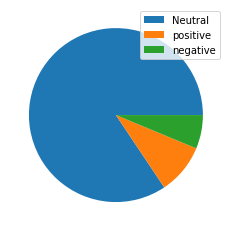

In [16]:
plt.pie(tb_counts)
plt.legend(['Neutral','positive','negative'])
plt.show()

In [17]:
df3=df2.copy()
print(df3.head())

  What are the factors or circumstances that influenced you to change your preference?   \
0  I felt that, I can do courses later, or come u...                                      
1                      More employment opportunities                                      
2                                 Brutal competition                                      
3  The competitive atmosphere around me, and the ...                                      
4                                 Less medical seats                                      

                                     Cleaned Reviews  \
0  I felt that I can do courses later or come up ...   
1                      More employment opportunities   
2                                 Brutal competition   
3  The competitive atmosphere around me and the n...   
4                                 Less medical seats   

                                          POS tagged  \
0  [I, felt, that, I, can, do, course, later, or,...   
1   

In [18]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df3['Vader Sentiment'] = df3['Lemma'].dropna().apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df3['Vader Analysis'] = df3['Vader Sentiment'].apply(vader_analysis)
df3.head()

,What are the factors or circumstances that influenced you to change your preference?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Vader Sentiment,Vader Analysis
0,"I felt that, I can do courses later, or come u...",I felt that I can do courses later or come up ...,"[I, felt, that, I, can, do, course, later, or,...","[(felt, v), (course, n), (later, r), (come, v)...",felt course later come theory Mathematics ta...,0.000000,0.000000,Neutral,0.0000,Neutral
1,More employment opportunities,More employment opportunities,"[More, employment, opportunity]","[(employment, n), (opportunity, n)]",employment opportunity,0.000000,0.000000,Neutral,0.4215,Neutral
2,Brutal competition,Brutal competition,"[Brutal, competition]","[(Brutal, a), (competition, n)]",Brutal competition,1.000000,-0.875000,Negative,-0.6249,Negative
3,"The competitive atmosphere around me, and the ...",The competitive atmosphere around me and the n...,"[The, competitive, atmosphere, around, me, and...","[(competitive, a), (atmosphere, n), (around, N...",competitive atmosphere around need top succeed,0.500000,0.500000,Positive,0.6908,Positive
4,Less medical seats,Less medical seats,"[Less, medical, seat]","[(Less, n), (medical, a), (seat, n)]",Less medical seat,0.033333,-0.083333,Negative,0.0000,Neutral


In [20]:
vader_counts = df3['Vader Analysis'].value_counts()
vader_counts

Neutral     139
Positive      6
Negative      1
Name: Vader Analysis, dtype: int64

In [21]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [22]:
df3['SWN analysis'] = df3['POS stopword'].dropna().apply(sentiwordnetanalysis)

0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.625 0.375
0.0 0.0 1.0
0.125 0.375 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.625 0.375
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.25 0.75
0.125 0.125 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.25 0.5
0.0 0.375 0.625
0.0 0.0 1.0
0.25 0.25 0.5
0.0 0.0 1.0
0.25 0.25 0.5
0.0 0.0 1.0
0.25 0.25 0.5
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.125 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.375 0.625
0.0 0.0 1.0
0.5 0.0 0.5
0.25 0.25 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.875 0.0 0.125
0.0 0.0 1.0
0.0 0.0 1.0
0.375 0.0 0.625
0.125 0.0 0.875
0.25 0.25 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.375 0.0 0.625
0.25 0.25 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.5 0.5
0.0 0.0 1.0
0.25 0.25 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.25 0.25 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.25 0.5
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.25

In [23]:
swn_counts= df3['SWN analysis'].value_counts()
swn_counts

Neutral     87
Positive    14
Negative    11
Name: SWN analysis, dtype: int64

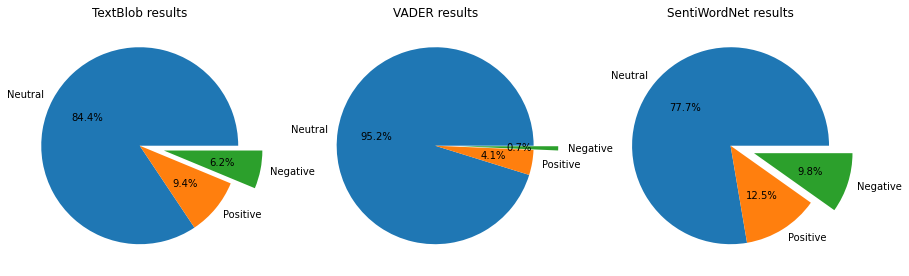

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0,0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()